<a href="https://colab.research.google.com/github/vyshnaviKasinadhuni/sentiment-Analysis/blob/main/review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [3]:
data_set=pd.read_csv("/content/Review.csv") 

In [4]:
data_set.head(5)

,sentiment_polarity,sentiment_polarity_confidence,negative_reason,negativereason_confidence,airline_name,airline_sentiment_gold,name,negativereason_gold,retweet_count,Review,tweet_coord,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24/02/15 11:35,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24/02/15 11:15,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24/02/15 11:15,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24/02/15 11:15,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24/02/15 11:14,NaN,Pacific Time (US & Canada)


In [5]:
data_set.describe(
)

,sentiment_polarity_confidence,negativereason_confidence,retweet_count
count,14640.000000,10522.000000,14640.000000
mean,0.900169,0.638298,0.082650
std,0.162830,0.330440,0.745778
min,0.335000,0.000000,0.000000
25%,0.692300,0.360600,0.000000
50%,1.000000,0.670600,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,1.000000,44.000000


In [6]:
data_set.isnull().sum()

sentiment_polarity                   0
sentiment_polarity_confidence        0
negative_reason                   5462
negativereason_confidence         4118
airline_name                         0
airline_sentiment_gold           14600
name                                 0
negativereason_gold              14608
retweet_count                        0
Review                               0
tweet_coord                      13621
tweet_created                        0
tweet_location                    4733
user_timezone                     4820
dtype: int64

In [7]:
data_set.shape

(14640, 14)

In [8]:
#data_set['tweet_coord'].value_counts()

In [9]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   sentiment_polarity             14640 non-null  object 
 1   sentiment_polarity_confidence  14640 non-null  float64
 2   negative_reason                9178 non-null   object 
 3   negativereason_confidence      10522 non-null  float64
 4   airline_name                   14640 non-null  object 
 5   airline_sentiment_gold         40 non-null     object 
 6   name                           14640 non-null  object 
 7   negativereason_gold            32 non-null     object 
 8   retweet_count                  14640 non-null  int64  
 9   Review                         14640 non-null  object 
 10  tweet_coord                    1019 non-null   object 
 11  tweet_created                  14640 non-null  object 
 12  tweet_location                 9907 non-null  

In [10]:
data_set.columns


Index(['sentiment_polarity', 'sentiment_polarity_confidence',
       'negative_reason', 'negativereason_confidence', 'airline_name',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'Review', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [11]:
data_set=data_set.drop(['airline_sentiment_gold'], axis=1)
data_set=data_set.drop(['negativereason_gold'], axis=1)
data_set=data_set.drop(['tweet_coord'], axis=1)
data_set=data_set.drop(['negative_reason'], axis=1)
data_set=data_set.drop(['user_timezone'],axis=1)

In [12]:
data_set.isnull().sum()

sentiment_polarity                  0
sentiment_polarity_confidence       0
negativereason_confidence        4118
airline_name                        0
name                                0
retweet_count                       0
Review                              0
tweet_created                       0
tweet_location                   4733
dtype: int64

In [13]:
#data_set['negative_reason'] =  data_set['negative_reason'].fillna('none')
#data_set['negative_reason']=data_set['negative_reason'].fillna(method='ffill')
#data_set['negative_reason']=data_set['negative_reason'].fillna(method='backfill')

In [14]:
data_set['negativereason_confidence'].fillna((data_set['negativereason_confidence'].mean()), inplace=True)

In [15]:
new_data = data_set.dropna(axis = 0) 

In [16]:
new_data.isnull().sum()

sentiment_polarity               0
sentiment_polarity_confidence    0
negativereason_confidence        0
airline_name                     0
name                             0
retweet_count                    0
Review                           0
tweet_created                    0
tweet_location                   0
dtype: int64

In [17]:
#data_set['user_timezone'] =  data_set['user_timezone'].fillna('na')
#data_set['tweet_location'] =  data_set['tweet_location'].fillna('na')
#data_set['user_timezone']=data_set['user_timezone'].fillna(method='ffill')
#data_set['tweet_location']=data_set['tweet_location'].fillna(method='ffill')
#data_set['tweet_location']=data_set['tweet_location'].fillna(method='backfill')
#data_set['sentiment_polarity'].value_counts()
#data_set['sentiment_polarity_confidence'].value_counts()
#data_set['negative_reason'].value_counts()
#data_set['negativereason_confidence'].value_counts()
#data_set['airline_name'].value_counts()
#data_set['retweet_count'].value_counts()
#data_set['tweet_created'].value_counts()
#data_set['tweet_location'].value_counts()
#data_set['user_timezone'].value_counts()
#data_set['user_timezone'].value_counts()
#data_set['name'].value_counts()
#data_set['Review'].value_counts()


In [18]:
new_data.head(2)

,sentiment_polarity,sentiment_polarity_confidence,negativereason_confidence,airline_name,name,retweet_count,Review,tweet_created,tweet_location
2,neutral,0.6837,0.638298,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,24/02/15 11:15,Lets Play
6,positive,0.6745,0.000000,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",24/02/15 11:13,San Francisco CA


**Text Cleaning**



In [19]:
# Method to remove special characters 
def remove_specialCharacters(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [20]:
new_data['Review']=new_data['Review'].apply(remove_specialCharacters)
new_data['name']=new_data['name'].apply(remove_specialCharacters)

<ipython-input-20-fc3b0acba2cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Review']=new_data['Review'].apply(remove_specialCharacters)
<ipython-input-20-fc3b0acba2cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['name']=new_data['name'].apply(remove_specialCharacters)


In [21]:
new_data.head(2)

,sentiment_polarity,sentiment_polarity_confidence,negativereason_confidence,airline_name,name,retweet_count,Review,tweet_created,tweet_location
2,neutral,0.6837,0.638298,Virgin America,yvonnalynn,0,VirginAmerica I didnt today Must mean I need t...,24/02/15 11:15,Lets Play
6,positive,0.6745,0.000000,Virgin America,cjmcginnis,0,VirginAmerica yes nearly every time I fly VX t...,24/02/15 11:13,San Francisco CA


In [22]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
new_data['Review'] = new_data['Review'].apply(lambda x:x.lower())

<ipython-input-23-e287a80bbd94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Review'] = new_data['Review'].apply(lambda x:x.lower())


In [24]:
def stopWords_remove(txt):
    text_tokens=word_tokenize(txt)
    #tokens_without_sw=[word for word in text_tokens if not word.lower() in stopwords.words()]
    tokens_without_sw=[word for word in text_tokens if not word in stopwords.words()]
    #print(tokens_without_sw)
    string1=" ".join(tokens_without_sw)
    return string1

In [25]:
new_data['Review']=new_data['Review'].apply(stopWords_remove) 

<ipython-input-25-0f69f3156ca9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Review']=new_data['Review'].apply(stopWords_remove)


In [26]:
new_data['Review']

2                                 virginamerica today trip
6                  virginamerica time fly vx ear worm away
7        virginamerica missed prime opportunity hats pa...
8                                   virginamerica didntbut
9           virginamerica amazing arrived hour early youre
                               ...                        
14633    americanair flight cancelled flightled leaving...
14636    americanair leaving 20 minutes late flight war...
14637     americanair bring american airlines blackberry10
14638    americanair money change flight answer phones ...
14639    americanair 8 ppl 2 seats flight plz put stand...
Name: Review, Length: 9907, dtype: object

In [27]:
airline_namelist=list(set(new_data["airline_name"].values.tolist()))

In [28]:
def remove_airline_name(text):
  x=text.replace(" ", "")
  return x.lower()

In [29]:
airline_list=[remove_airline_name(x) for x in airline_namelist]
print(airline_list)

['delta', 'virginamerica', 'southwest', 'united', 'usairways', 'american']


In [30]:
pat = r'\b(?:{})\b'.format('|'.join(airline_list))
new_data['Review'] = new_data['Review'].str.replace(pat, '')

<ipython-input-30-a730ce664f34>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  new_data['Review'] = new_data['Review'].str.replace(pat, '')
<ipython-input-30-a730ce664f34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Review'] = new_data['Review'].str.replace(pat, '')


In [31]:
new_data['Review']

2                                               today trip
6                                time fly vx ear worm away
7                     missed prime opportunity hats parody
8                                                 didntbut
9                         amazing arrived hour early youre
                               ...                        
14633    americanair flight cancelled flightled leaving...
14636    americanair leaving 20 minutes late flight war...
14637             americanair bring  airlines blackberry10
14638    americanair money change flight answer phones ...
14639    americanair 8 ppl 2 seats flight plz put stand...
Name: Review, Length: 9907, dtype: object

In [32]:
# import these modules
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


rocks : rock
corpora : corpus


In [33]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
def lemmatizer_text(tex):
  text_tokens=word_tokenize(tex)
  list1=[lemmatizer.lemmatize(word) for word in text_tokens]
  string1=" ".join(list1)
  return string1

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [34]:
new_data['Review']=new_data['Review'].apply(lemmatizer_text)

<ipython-input-34-7135e8e635eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Review']=new_data['Review'].apply(lemmatizer_text)


In [35]:
new_data.head()

,sentiment_polarity,sentiment_polarity_confidence,negativereason_confidence,airline_name,name,retweet_count,Review,tweet_created,tweet_location
2,neutral,0.6837,0.638298,Virgin America,yvonnalynn,0,today trip,24/02/15 11:15,Lets Play
6,positive,0.6745,0.000000,Virgin America,cjmcginnis,0,time fly vx ear worm away,24/02/15 11:13,San Francisco CA
7,neutral,0.6340,0.638298,Virgin America,pilot,0,missed prime opportunity hat parody,24/02/15 11:12,Los Angeles
8,positive,0.6559,0.638298,Virgin America,dhepburn,0,didntbut,24/02/15 11:11,San Diego
9,positive,1.0000,0.638298,Virgin America,YupitsTate,0,amazing arrived hour early youre,24/02/15 10:53,Los Angeles


**EDA**



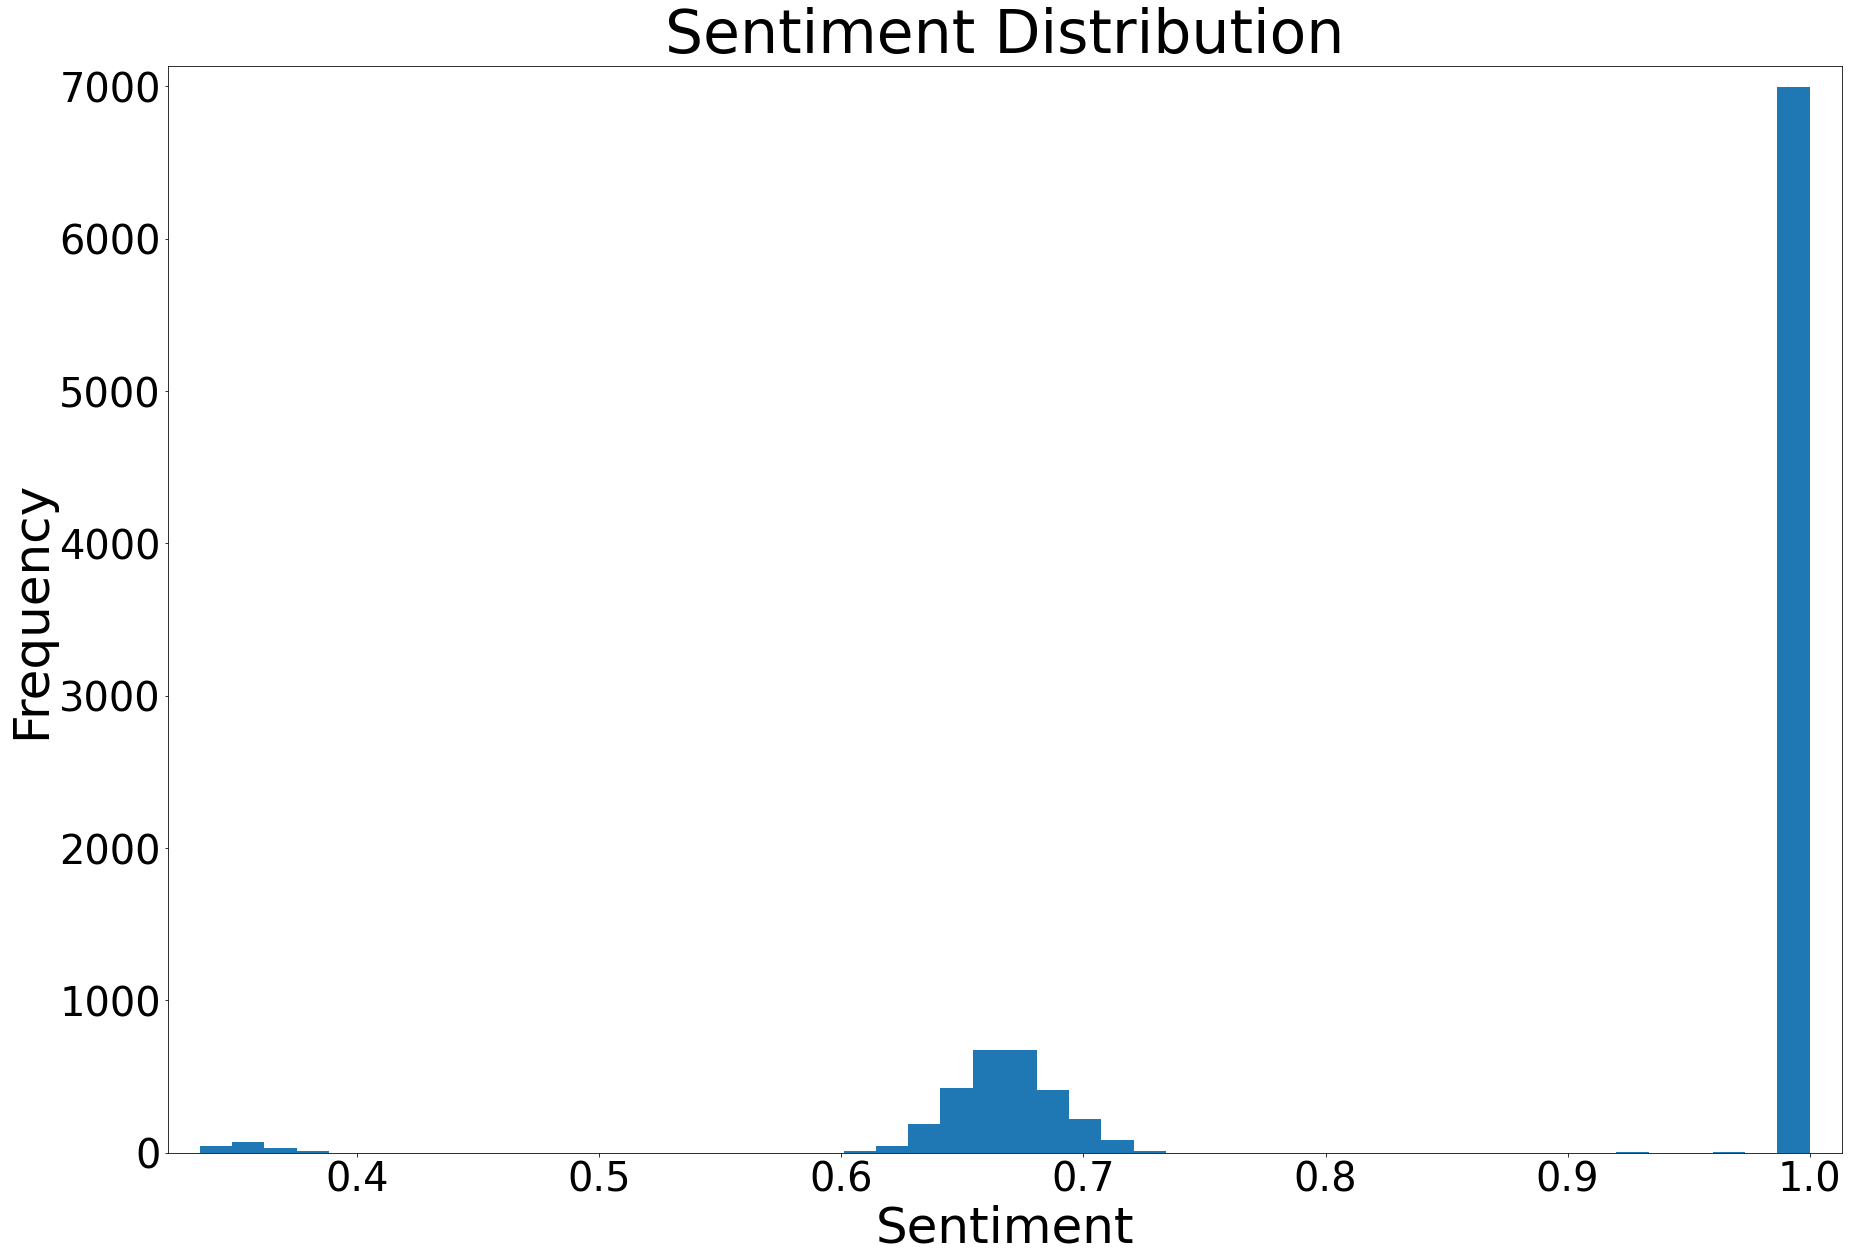

In [36]:
plt.figure(figsize=(30,20))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(new_data['sentiment_polarity_confidence'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

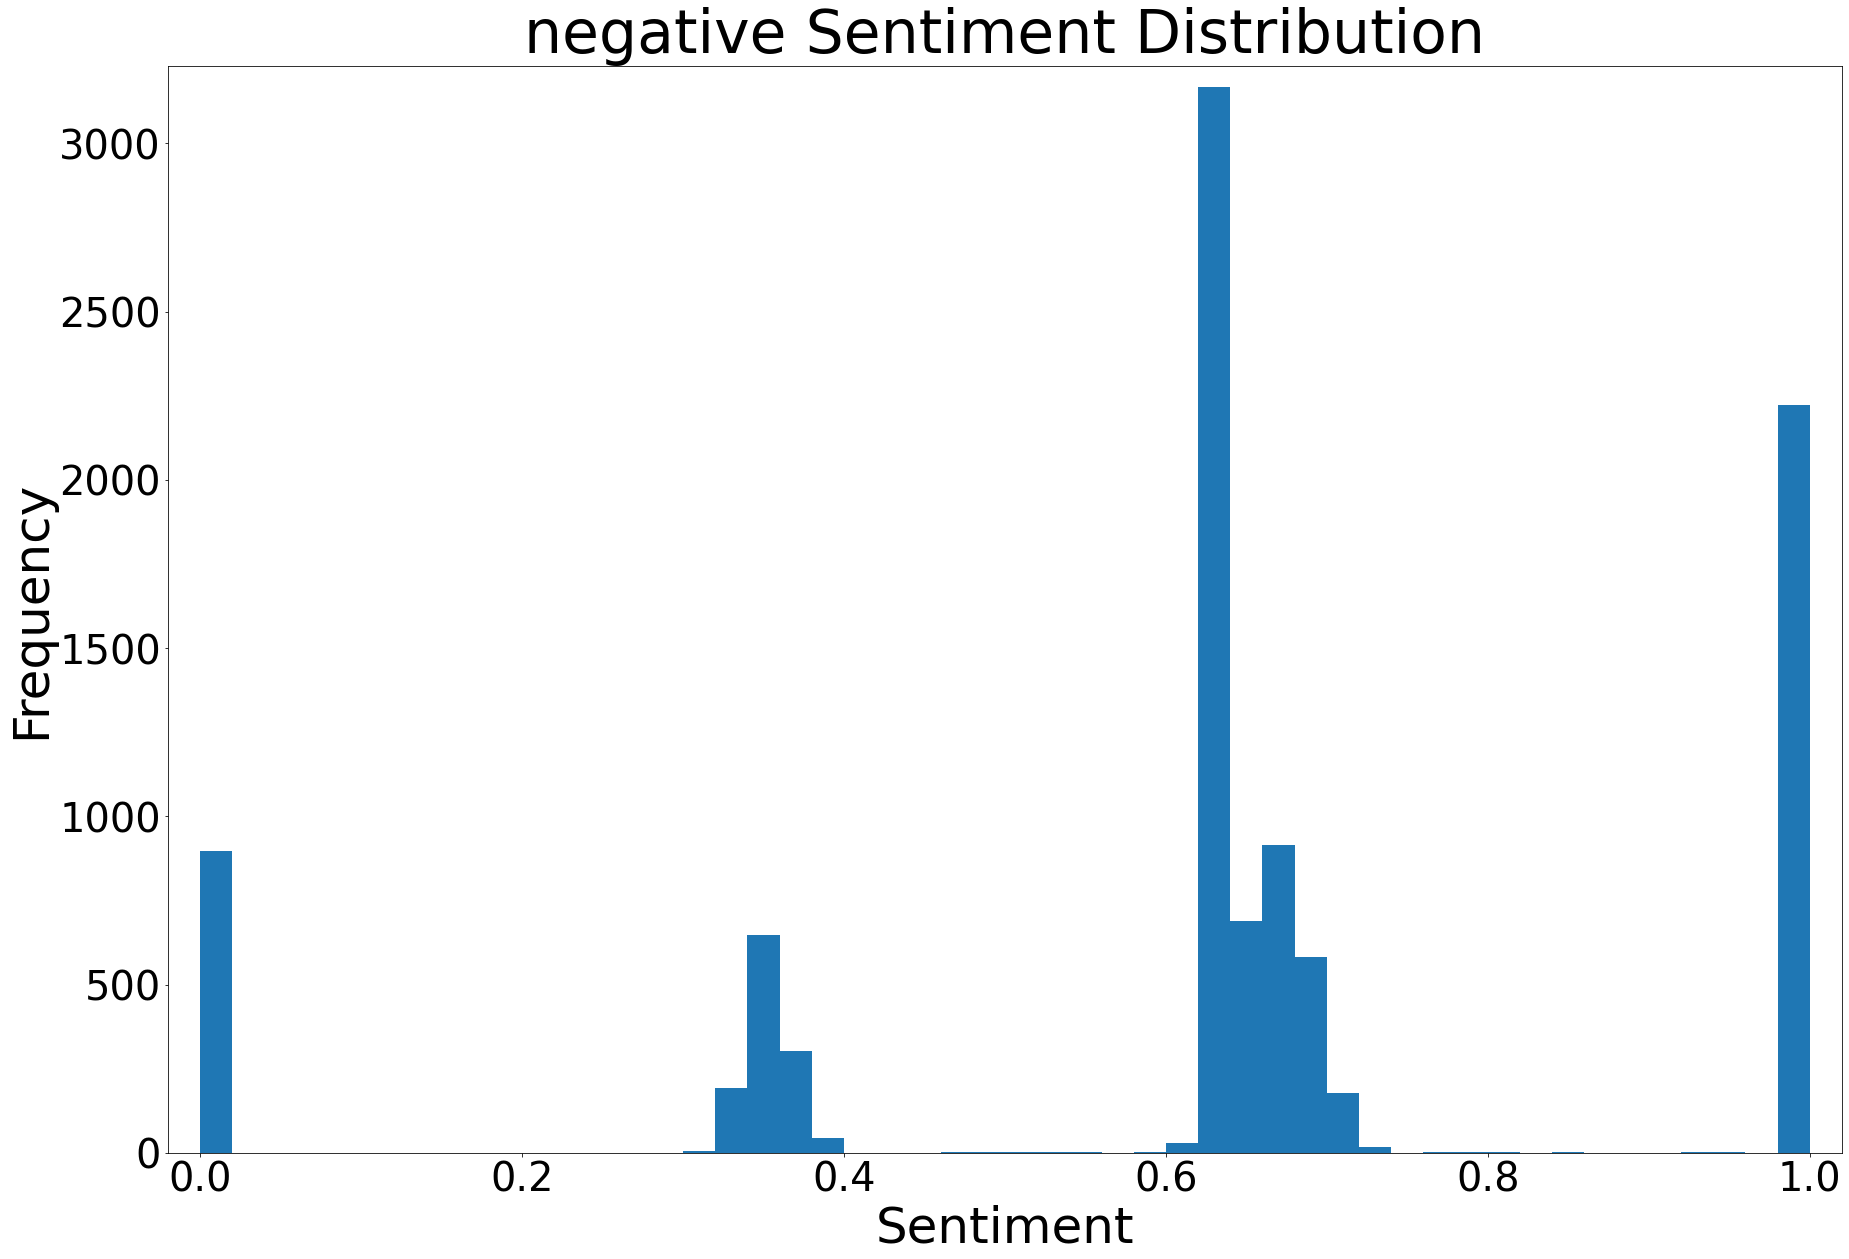

In [37]:
plt.figure(figsize=(30,20))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(new_data['negativereason_confidence'], bins=50)
plt.title('negative Sentiment Distribution', fontsize=60)
plt.show()



*   We observe that in *sentiment_polarity_confidence* value 1 is having higher distribution in the wholw data


*  we observe that in *negativereason_confidence* higher distribution is at 0.7






/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


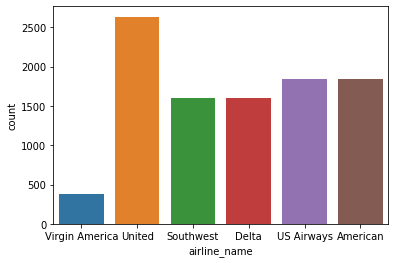

In [38]:
sns.countplot('airline_name', data=new_data)

It is observed that United is having many reviews

---



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


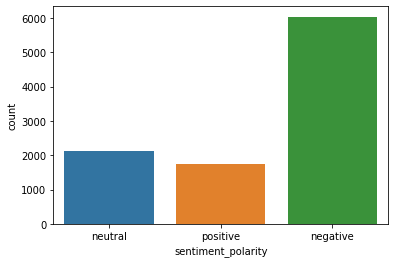

In [39]:
sns.countplot('sentiment_polarity', data=new_data)

:**There are more negative reviews in the data we are  analysing **

Seperating positive , negative and neutral polarities to different data frames for better analysis


In [40]:
positive = new_data[new_data['sentiment_polarity'] == 'positive']
negative = new_data[new_data['sentiment_polarity'] == 'negative']
neutral=new_data[new_data['sentiment_polarity']== 'neutral']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


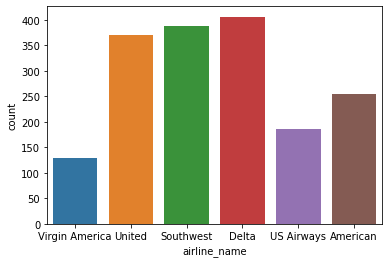

In [41]:
sns.countplot('airline_name', data=positive)

it is observed that More positive reviews are for Delta




/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


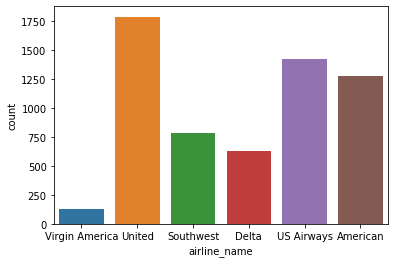

In [42]:
sns.countplot('airline_name', data=negative)

It is observed that more negative reviews are for **United**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


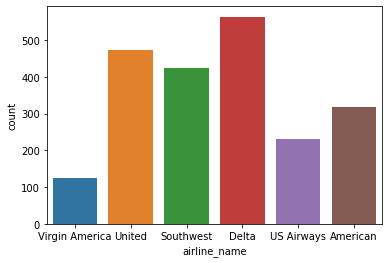

In [43]:
sns.countplot('airline_name', data=neutral)

It is observed that neutral reviews are high for **Delta**

In [44]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(10, 5))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

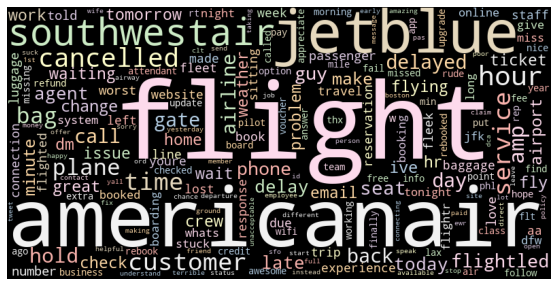

In [45]:
text = " ".join(review for review in new_data['Review'])
# Generate word cloud
wordcloud = WordCloud(width= 800, height = 400, random_state=1, background_color='black', colormap='Pastel1', collocations=False).generate(text)
# Plot
plot_cloud(wordcloud)

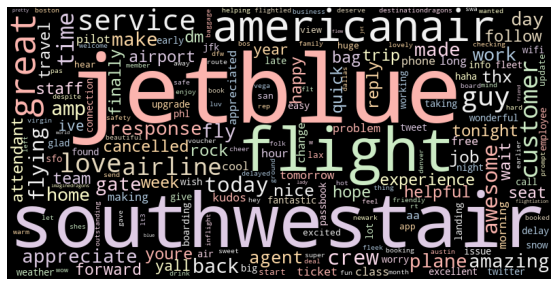

In [46]:
text = " ".join(review for review in positive['Review'])
# Generate word cloud
wordcloud = WordCloud(width= 800, height = 400, random_state=1, background_color='black', colormap='Pastel1', collocations=False).generate(text)
# Plot
plot_cloud(wordcloud)

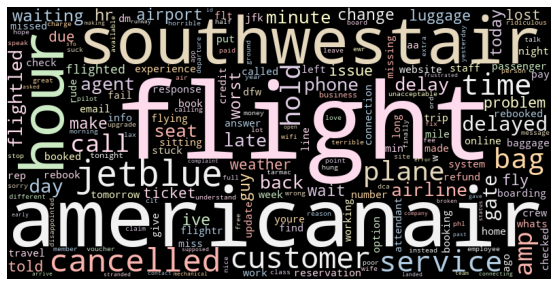

In [47]:
text = " ".join(review for review in negative['Review'])
# Generate word cloud
wordcloud = WordCloud(width= 800, height = 400, random_state=1, background_color='black', colormap='Pastel1', collocations=False).generate(text)
# Plot
plot_cloud(wordcloud)

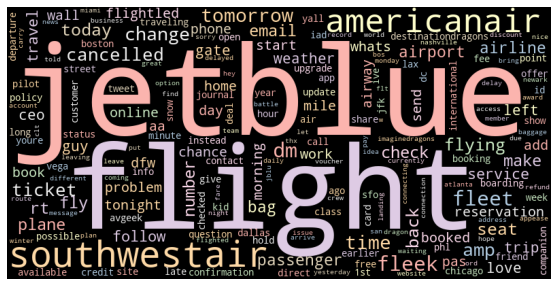

In [48]:
text = " ".join(review for review in neutral['Review'])
# Generate word cloud
wordcloud = WordCloud(width= 800, height = 400, random_state=1, background_color='black', colormap='Pastel1', collocations=False).generate(text)
# Plot
plot_cloud(wordcloud)

In [49]:
new_data['airline_name'].value_counts()

United            2633
American          1848
US Airways        1844
Delta             1604
Southwest         1596
Virgin America     382
Name: airline_name, dtype: int64

In [50]:
virgin_america= new_data[new_data['airline_name'] == 'Virgin America']
united= new_data[new_data['airline_name'] == 'United']
american= new_data[new_data['airline_name'] == 'American']
us_airways= new_data[new_data['airline_name'] == 'US Airways']
delta= new_data[new_data['airline_name'] == 'Delta']
south_west= new_data[new_data['airline_name'] == 'Southwest']


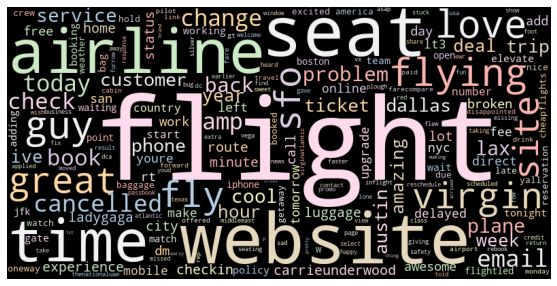

In [51]:
text = " ".join(review for review in virgin_america['Review'])
# Generate word cloud
wordcloud = WordCloud(width= 800, height = 400, random_state=1, background_color='black', colormap='Pastel1', collocations=False).generate(text)
# Plot
plot_cloud(wordcloud)

**For airline virgin America the 5 frequent words in the review are flight , website,time,seat, flying,airline**

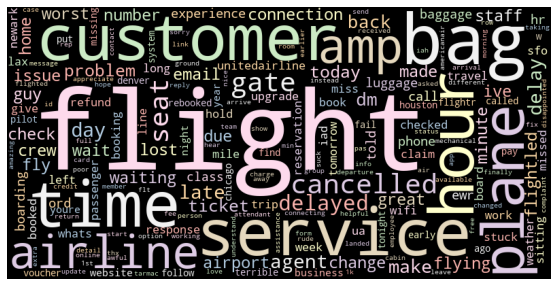

In [52]:
text = " ".join(review for review in united['Review'])
# Generate word cloud
wordcloud = WordCloud(width= 800, height = 400, random_state=1, background_color='black', colormap='Pastel1', collocations=False).generate(text)
# Plot
plot_cloud(wordcloud)

**For airline united the 5 frequent words in the review are flight , customer,bag,time,service,plane**

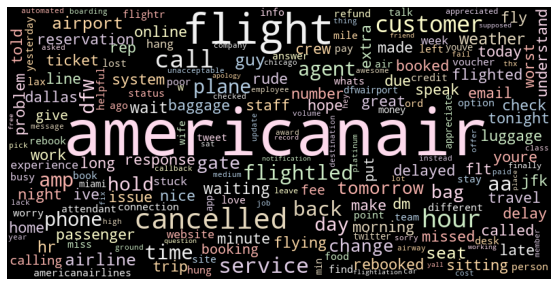

In [53]:
text = " ".join(review for review in american['Review'])
# Generate word cloud
wordcloud = WordCloud(width= 800, height = 400, random_state=1, background_color='black', colormap='Pastel1', collocations=False).generate(text)
# Plot
plot_cloud(wordcloud)

**For airline American the 5 frequent words in the review are americanair,flight,customer,hour,cancelled**

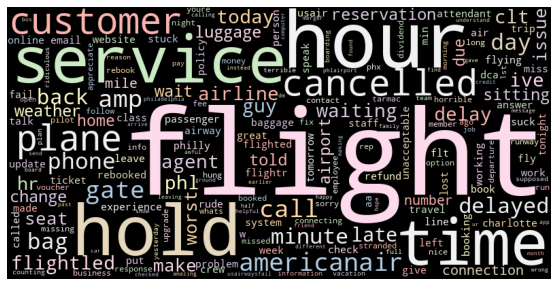

In [54]:
text = " ".join(review for review in us_airways['Review'])
# Generate word cloud
wordcloud = WordCloud(width= 800, height = 400, random_state=1, background_color='black', colormap='Pastel1', collocations=False).generate(text)
# Plot
plot_cloud(wordcloud)

**For airline us_airways the 5 frequent words in the review are flight , hold,time,service,customer**

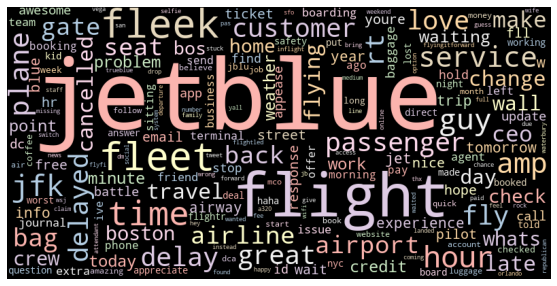

In [55]:
text = " ".join(review for review in delta['Review'])
# Generate word cloud
wordcloud = WordCloud(width= 800, height = 400, random_state=1, background_color='black', colormap='Pastel1', collocations=False).generate(text)
# Plot
plot_cloud(wordcloud)

**For airline virgin America the 5 frequent words in the review are jetblue,flight,fleet,service,delayed**

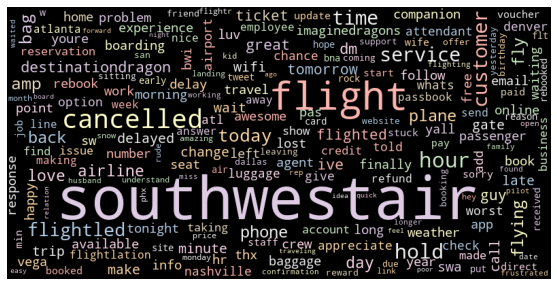

In [56]:
text = " ".join(review for review in south_west['Review'])
# Generate word cloud
wordcloud = WordCloud(width= 800, height = 400, random_state=1, background_color='black', colormap='Pastel1', collocations=False).generate(text)
# Plot
plot_cloud(wordcloud)

**For airline virgin America the 5 frequent words in the review are southwestair,cancelled,flight,flighted,flying**

In [57]:
new_data['Review']

2                                               today trip
6                                time fly vx ear worm away
7                      missed prime opportunity hat parody
8                                                 didntbut
9                         amazing arrived hour early youre
                               ...                        
14633    americanair flight cancelled flightled leaving...
14636    americanair leaving 20 minute late flight warn...
14637               americanair bring airline blackberry10
14638    americanair money change flight answer phone s...
14639    americanair 8 ppl 2 seat flight plz put standb...
Name: Review, Length: 9907, dtype: object

**Seperating reviews for each airline company**

In [58]:
df_airline_seperate=new_data[['airline_name','Review']].groupby(by='airline_name').agg(lambda x:' '.join(x))
df_airline_seperate.head()

,Review
airline_name,
American,americanair stranded 24 hour patrick casimir a...
Delta,jetblue yesterday ewr fll takeoff wheelsup jet...
Southwest,southwestair waiting hit hour southwestair hap...
US Airways,dm possible flight 645 phoenix deboards passen...
United,taking mr happy customer refund word dm resol...


In [59]:
def remove_numbers(tex):
  pattern = r'[0-9]'
  new_string = re.sub(pattern, '', tex)
  return new_string

In [60]:
df_airline_seperate['Review']=df_airline_seperate['Review'].apply(remove_numbers)

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_airline_seperate['Review'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_airline_seperate.index
df_dtm.head(3)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaadvantage,aaba,aacustomerservice,aadavantage,aadelay,aadfw,aadv,aadvantage,aafail,...,zipper,zj,zkatcher,zombie,zone,zoom,zrh,zrhairport,zurich,zurichnew
airline_name,,,,,,,,,,,,,,,,,,,,,
American,147,1,1,1,1,1,2,2,4,2,...,0,0,0,0,0,0,0,0,1,1
Delta,3,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
Southwest,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


**Final Analysis:**


**We observe that in sentiment_polarity_confidence value 1 is having higher distribution in the whole data**

**we observe that in negativereason_confidence higher distribution is at 0.7**

**It is observed that United is having many reviews**

**There are more negative reviews in the data we are  analysing**

**it is observed that More positive reviews are for Delta**

**It is observed that more negative reviews are for United**

**It is observed that neutral reviews are high for Delta**

**For airline virgin America the 5 frequent words in the review are flight , website,time,seat, flying,airline**

**For airline united the 5 frequent words in the review are flight , customer,bag,time,service,plane**

**For airline American the 5 frequent words in the review are americanair,flight,customer,hour,cancelled**

**For airline us_airways the 5 frequent words in the review are flight , hold,time,service,customer**

**For airline virgin America the 5 frequent words in the review are southwestair,cancelled,flight,flighted,flying**




In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=2000)
features = vectorizer.fit_transform(new_data['Review'])


In [68]:
review_numbers=[i for i in features]
new_data['review_numbers1']=review_numbers

<ipython-input-68-4e5634dfb8e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['review_numbers1']=review_numbers


In [69]:
#label encoding

from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
new_data['sentiment_polarity']= label_encoder.fit_transform(new_data['sentiment_polarity'])
  
new_data['sentiment_polarity'].unique()

<ipython-input-69-a7da30e453d6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['sentiment_polarity']= label_encoder.fit_transform(new_data['sentiment_polarity'])


array([1, 2, 0])

In [70]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
target=new_data['sentiment_polarity']
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2)
clf = lgb.LGBMClassifier(max_depth=20,n_estimators=25,n_jobs=-1)
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
print(accuracy_score(y_test,pred))




0.6478304742684158


In [71]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.65      0.96      0.78      1157
           1       0.56      0.18      0.27       464
           2       0.67      0.26      0.38       361

    accuracy                           0.65      1982
   macro avg       0.63      0.47      0.48      1982
weighted avg       0.63      0.65      0.59      1982



In [72]:
new_data.head(1)

,sentiment_polarity,sentiment_polarity_confidence,negativereason_confidence,airline_name,name,retweet_count,Review,tweet_created,tweet_location,review_numbers1
2,1,0.6837,0.638298,Virgin America,yvonnalynn,0,today trip,24/02/15 11:15,Lets Play,"(0, 1837)\t0.7500342188369595\n (0, 1807)\t..."


In [73]:
new_data.columns

Index(['sentiment_polarity', 'sentiment_polarity_confidence',
       'negativereason_confidence', 'airline_name', 'name', 'retweet_count',
       'Review', 'tweet_created', 'tweet_location', 'review_numbers1'],
      dtype='object')

In [78]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=1000)
classifier.fit(x_train, y_train)

score = classifier.score(x_test, y_test)

print("Accuracy:", score)

Accuracy: 0.7204843592330978


In [80]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred, labels=new_data.sentiment_polarity.unique())
df_cm = pd.DataFrame(cm, index=new_data.sentiment_polarity.unique(), columns=new_data.sentiment_polarity.unique())
df_cm

,1,2,0
1,201,37,226
2,55,160,146
0,60,30,1067


In [81]:
df_cm_percentage = df_cm.copy()
for i in df_cm_percentage:
  df_cm_percentage[i]/=df_cm_percentage[i].sum()

df_cm_percentage

,1,2,0
1,0.636076,0.162996,0.157054
2,0.174051,0.704846,0.101459
0,0.189873,0.132159,0.741487


In [95]:
import numpy as np
review_List = ['this flight journey experience is discomfortable!', 'best services provided i loved services it']
vectTweet = vectorizer.transform(np.array(review_List))  # vectorizes the tweet using our vectorizer

prediction = classifier.predict(vectTweet)  # predicts class of the tweet
for enum, i in enumerate(review_List):
  #print(i, '| This tweet is', 'positive' if prediction[enum]==4 else 'negative')
  if(prediction[enum]==0):
    print(i+"  is a ====>"+"negative review")
  elif(prediction[enum]==1):
    print(i+"  is a ====>"+"positive review")
  else:
    print(i+"  is a ====>"+"neutral review")
  #print(enum,i)

this flight journey experience is discomfortable!  is a ====>negative review
best services provided i loved services it  is a ====>neutral review
